### Rachel Singleton
##### Homework 5
##### Math 472 - Comp Stats

### Question 1:
The data set (y_i,z_i) for i=1,...,n, where z_i=(z_1i,z_2i), follows the following model:
y_i = (theta)_0*exp(-(theta)_1*z_1i-(theta)_2*z_2i)+(epsilon)_i where (epsilon)_i is the random error. 

Given the attached data set, estimate the model paramters (THETA) = [theta_0,theta_1,theta_2].transpose using Gauss-Newton method.  

## Part A

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("dataHW5-1.csv", delimiter=" ", header = 0, names = ["y", "z1", "z2"])

y = data['y'].to_numpy().reshape((50,1))
z1 = data['z1'].to_numpy().reshape((50,1))
z2 = data['z2'].to_numpy().reshape((50,1))
z = data[['z1','z2']].to_numpy()

theta0s = [-1]
theta1s = [1]
theta2s = [-1]
thetas = []

def function_f(z,theta0,theta1,theta2):
    f = []
    for i in range(len(y)):
        val = theta0*np.exp(-theta1*z[i][0]-theta2*z[i][1])
        f.append(val)
    f = np.asarray(f).reshape((50,1))
    return f

def findA(z,theta0,theta1,theta2):
    A = []
    for i in range(len(y)):
        part_theta0 = np.exp(-theta1*z[i][0]-theta2*z[i][1])
        part_theta1 = theta0*(-z[i][0])*np.exp(-theta1*z[i][0]-theta2*z[i][1])
        part_theta2 = theta0*(-z[i][1])*np.exp(-theta1*z[i][0]-theta2*z[i][1])
        A.append([part_theta0,part_theta1,part_theta2])
    A = np.asarray(A)
    return A
    
def findX(z,theta0,theta1,theta2):
    return y - function_f(z,theta0,theta1,theta2)

appendedlist = []
def theta_update(z,theta0s,theta1s,theta2s):
    values = []
    max_iterations = 20
    num_iterations = 0
    theta = [theta0s,theta1s,theta2s]
    theta = np.asarray(theta)
    thetas.append(theta)
    values = [num_iterations,theta]
    
    while(num_iterations < max_iterations):
        theta = theta + (np.linalg.inv((findA(z,theta[0][0],theta[1][0],theta[2][0]).T).dot(
            findA(z,theta[0][0],theta[1][0],theta[2][0]))).dot(findA(z,theta[0][0],theta[1][0],theta[2][0]).T)).dot(
            findX(z,theta[0][0],theta[1][0],theta[2][0]))
        thetas.append(theta)
        num_iterations += 1
        theta = thetas[num_iterations]
        theta0s.append(theta[0][0])
        theta1s.append(theta[1][0])
        theta2s.append(theta[2][0])
        values = [num_iterations,theta]
        appendedlist.append(values)
        
theta_update(z,theta0s,theta1s,theta2s)
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Thetas'])
df = df.iloc[15:20,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

"Iteration,t",Thetas
16,[[ 5.71460879] [ 2.98606948] [-0.27215695]]
17,[[ 5.71460881] [ 2.98606949] [-0.27215695]]
18,[[ 5.7146088 ] [ 2.98606949] [-0.27215695]]
19,[[ 5.71460881] [ 2.98606949] [-0.27215695]]
20,[[ 5.71460881] [ 2.98606949] [-0.27215695]]


## Part B

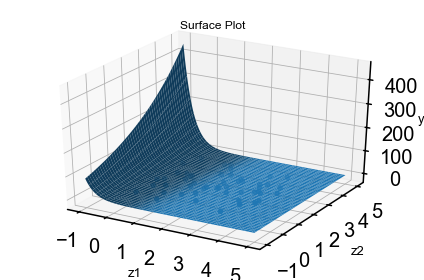

In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

def plot_function(z1,z2):
    theta0 = theta0s[-1]
    theta1 = theta1s[-1]
    theta2 = theta2s[-1]
    return theta0*np.exp(-theta1*z1-theta2*z2)

z1s = np.linspace(-1, 5, 400)
z2s = np.linspace(-1, 5, 400)

Z1, Z2 = np.meshgrid(z1s, z2s)
Zmesh = np.zeros((Z1.shape[0],Z2.shape[0]))

for i in range(Z1.shape[0]):
    for j in range(Z2.shape[0]):
        zz1 = Z1[i,j]; zz2 = Z2[i,j]
        Zmesh[i,j]=plot_function(zz1,zz2)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Z1, Z2, Zmesh)

ax.scatter3D(z1,z2,y)

matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
ax.set_zlabel('y',fontsize=13)
ax.set_xlabel('z1',fontsize=13)
ax.set_ylabel('z2',fontsize=13)
ax.yaxis.labelpad=18
ax.xaxis.labelpad=18
ax.zaxis.labelpad=10
plt.tight_layout()
plt.title("Surface Plot")
plt.show()


### Question 2:
Reproduce the solution to Example 4.2. That is, present the output of your code in the format of Table 4.1.

In [3]:
num_C = 85
num_I = 196
num_T = 341
n = num_C + num_I + num_T
pT = 1/3
pC = 1/3
pI = 1/3


def expect_CC(num_C,pC,pI,pT):
    return ((num_C)*(pC)**2)/((pC**2)+2*pC*pI+2*pC*pT)
def expect_CI(num_C,pC,pI,pT):
    return ((2*num_C)*(pC)*(pI))/((pC**2)+(2*pC*pI)+(2*pC*pT))
def expect_CT(num_C,pC,pI,pT):
    return ((2*num_C)*(pC)*(pT))/((pC**2)+(2*pC*pI)+(2*pC*pT))
def expect_II(num_I,pI,pT):
    return ((num_I)*(pI**2))/((pI**2)+(2*pI*pT))
def expect_IT(num_I,pI,pT):
    return ((2*num_I)*(pI*pT))/((pI**2)+(2*pI*pT))

def update_pC(n_CC,n_CI,n_CT):
    return (2*n_CC+n_CI+n_CT)/(2*n)
def update_pI(n_II,n_IT,n_CI):
    return (2*n_II+n_IT+n_CI)/(2*n)
def update_pT(n_TT,n_CT,n_IT):
    return (2*n_TT+n_CT+n_IT)/(2*n)

def conv_criteria(pC,pI,pC1,pI1):
    p = np.array([pC,pI]).reshape((2,1))
    p1 = np.array([pC1,pI1]).reshape((2,1))
    r_top = np.linalg.norm(p-p1)
    r_bottom = np.linalg.norm(p1)
    return r_top/r_bottom
    
pc = [pC]
pi = [pI]
pt = [pT]
values = []
appendlist = []
convergences = ['-']
ratiosDC = ['-']
ratiosDI = ['-']
i = 0
tolerance = 0.00001
conv = 1

while(tolerance < conv):
    pC = update_pC(expect_CC(num_C,pc[i],pi[i],pt[i]),expect_CI(num_C,pc[i],pi[i],pt[i]),
                   expect_CT(num_C,pc[i],pi[i],pt[i]))
    pI = update_pI(expect_II(num_I,pi[i],pt[i]),expect_IT(num_I,pi[i],pt[i]),
                   expect_CI(num_C,pc[i],pi[i],pt[i])) 
    pT = update_pT(num_T,expect_CT(num_C,pc[i],pi[i],pt[i]),
                   expect_IT(num_I,pi[i],pt[i]))
    pc.append(pC)
    pi.append(pI)
    pt.append(pT)
    convergences.append(conv_criteria(pC,pI,pc[i],pi[i]))
    DC = (pC-0.07083690804839426)/(pc[i]-0.07083690804839426)
    ratiosDC.append(DC)
    DI = (pI-0.1887367920620008)/(pi[i]-0.1887367920620008)
    ratiosDI.append(DI)
    conv = convergences[i+1]
    values = [i,pc[i],pi[i],convergences[i],ratiosDC[i],ratiosDI[i]]
    appendlist.append(values)
    i += 1
    
print("EM Results")
df = pd.DataFrame(appendlist, columns = ['Iteration,t','pC^(t)','pI^(t)','R^(t)','D^t(C)','D^t(I)'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

EM Results


"Iteration,t",pC^(t),pI^(t),R^(t),D^t(C),D^t(I)
0,0.333333,0.333333,-,-,-
1,0.0819936,0.237406,0.570685,0.0425021,0.336588
2,0.071249,0.19787,0.163121,0.0369326,0.18765
3,0.070852,0.19036,0.035756,0.0367268,0.177775
4,0.0708375,0.189023,0.00658604,0.0367192,0.176102
5,0.0708369,0.188787,0.00116832,0.0367172,0.175156
6,0.0708369,0.188745,0.0002058,0.0366713,0.171379
7,0.0708369,0.188738,3.62052e-05,0.0354184,0.14957
